# CNN architecture for image classification
An implementation of a CIFAR10 image classification model, based on CNN architecture.
The architrcture will be simpler version of VGG B - a well-known image classification architecture, with 13 weight layers.

imports

In [ ]:
from tensorflow import keras
from keras.datasets.cifar10 import load_data
from keras.layers import Conv2D, BatchNormalization, Dropout, MaxPool2D, Input, ReLU, Flatten, Dense
from keras.utils import to_categorical
from keras import Model
from keras.utils import plot_model
from keras.optimizers import SGD, Adam
from matplotlib import pyplot as plt

Using TensorFlow backend.


# Load the dataset
load and normalize the CIFAR10 dataset

In [ ]:
(X_train, Y_train), (X_test, Y_test) = load_data()
# Normalize X_train and X_test to values in range[-1,1]
X_train, X_test = X_train.astype('float32'), X_test.astype('float32')
X_train = (X_train / 255.) * 2 - 1
X_test = (X_test / 255.) * 2 - 1
# one hot encode target values
Y_train, Y_test = to_categorical(Y_train), to_categorical(Y_test)

_, im_h, im_w, chnls = X_train.shape

# Define the classifier
The architecture will consist of two main parts:
- Features extraction
- Classification

The feature extraction contains several Convolutional blocks. The block structure will be:
- Conv + ReLU
- Conv + ReLU
- max pooling

The classification will contain Fully Connect layers and Dropout, to reduce over fitting.

The loss function will be crossentropy.

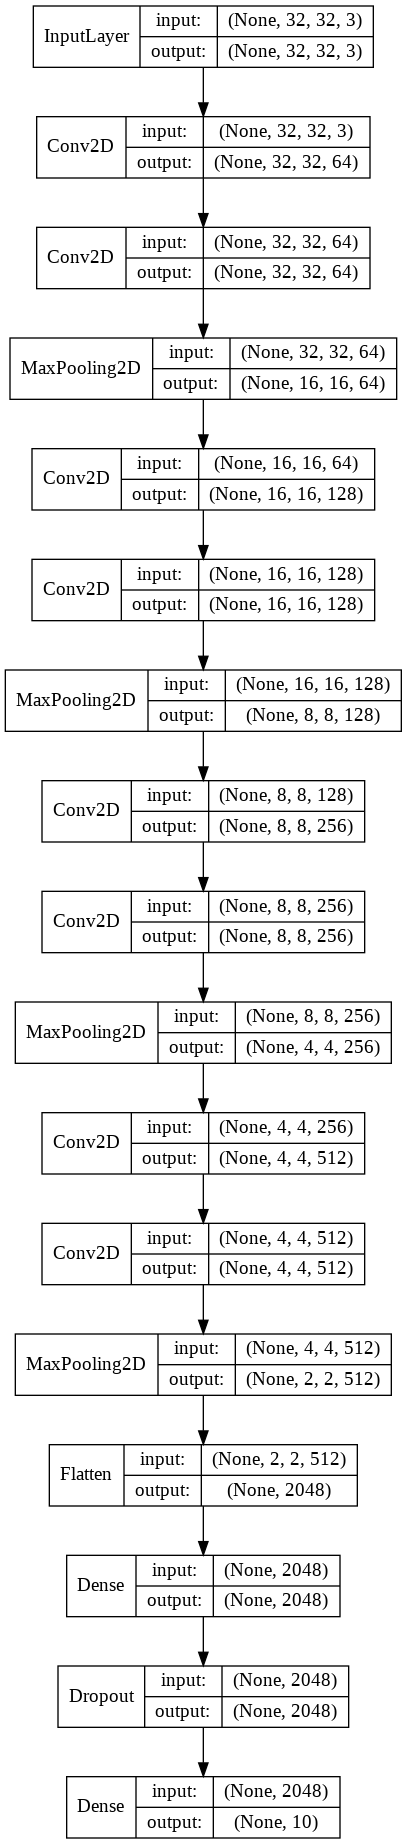

In [ ]:
# The network will be written using keras functional API coding

# creates a cnn block as described above
def cnn_block(inputs, filters, kernel_size=3):
  # first conv + relu
  block_output = Conv2D(filters=filters, kernel_size=kernel_size, padding='same', activation='relu')(inputs)
  # second conv + relu
  block_output = Conv2D(filters=filters, kernel_size=kernel_size, padding='same', activation='relu')(block_output)
  # max pooling to reduce spatial dimensions
  block_output = MaxPool2D(pool_size=(2, 2))(block_output)
  return block_output

kernels = [64, 128, 256, 512]

i = Input(shape=(im_h, im_w, chnls))
# Feature extraction
for block_num, kernel in enumerate(kernels):
  if block_num != 0:
    inputs = output
  else:
    inputs = i
  output = cnn_block(inputs, kernel)
# Classification
_, h,w,ch = output.shape
output = Flatten()(output)  # reshape the output from image shape into vector shape
output = Dense(h * w * ch, activation='relu')(output)
output = Dropout(0.5)(output)
output = Dense(10, activation='softmax')(output)

# Generate the model
CNN_classifier = Model(i, output)
# Compile the mode

CNN_classifier.compile(Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
plot_model(model=CNN_classifier, to_file='CNN_classifier_arch.png', show_shapes=True,show_layer_names=False)

# Train
Train the model to minimze the classification loss function

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

# a callback is an object that performs tasks during the fit process
my_callbacks = [EarlyStopping(patience=5, restore_best_weights=True),
                ModelCheckpoint(filepath='model.{epoch:02d}-{val_loss:.2f}.h5')]

history = CNN_classifier.fit(x=X_train, y=Y_train, batch_size=32, epochs=100, validation_data=[X_test, Y_test],callbacks=my_callbacks)

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 24s 485us/step - loss: 1.5507 - accuracy: 0.4242 - val_loss: 1.2152 - val_accuracy: 0.5545
Epoch 2/100
50000/50000 [==============================] - 23s 458us/step - loss: 1.0413 - accuracy: 0.6260 - val_loss: 0.9335 - val_accuracy: 0.6642
Epoch 3/100
50000/50000 [==============================] - 23s 457us/step - loss: 0.7978 - accuracy: 0.7203 - val_loss: 0.7523 - val_accuracy: 0.7366
Epoch 4/100
50000/50000 [==============================] - 23s 454us/step - loss: 0.6388 - accuracy: 0.7755 - val_loss: 0.6922 - val_accuracy: 0.7620
Epoch 5/100
50000/50000 [==============================] - 23s 456us/step - loss: 0.5158 - accuracy: 0.8210 - val_loss: 0.6406 - val_accuracy: 0.7817
Epoch 6/100
50000/50000 [==============================] - 23s 453us/step - loss: 0.4026 - accuracy: 0.8590 - val_loss: 0.5814 - val_accuracy: 0.8023
Epoch 7/100
50000/50000 [=========================

# Analyze training process

evaluate accuracy of the trained model



In [ ]:
_, acc = CNN_classifier.evaluate(x=X_test, y=Y_test)
print(f'CNN_classifier accuracy on test set - {acc:03f}')

10000/10000 [==============================] - 2s 153us/step
CNN_classifier accuracy on test set - 0.816800


visualize the performance during the training process

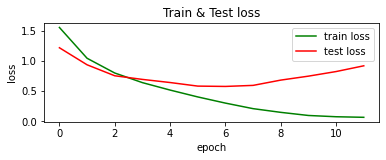

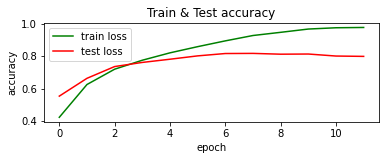

In [ ]:
# retrieve losses
train_loss = history.history['loss']
test_loss = history.history['val_loss']
# retrieve accuracies
train_acc = history.history['accuracy']
test_acc = history.history['val_accuracy']

# plot loss graph
plt.subplot(2,1,1)
plt.title('Train & Test loss')
plt.plot(train_loss,color='green')
plt.plot(test_loss,color='red')
plt.legend(['train loss', 'test loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()
# plot accuracy graph
plt.subplot(2,1,2)
plt.title('Train & Test accuracy')
plt.plot(train_acc,color='green')
plt.plot(test_acc,color='red')
plt.legend(['train loss', 'test loss'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

As we can see from the graph, after the sixth epoch, the test accuracy reduces and the loss increases due to overfitting. Therefore, the early stoping mechanism kicked in.